In [125]:
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D

In [2]:
from keras.models import Sequential

### Set up a deep convolutional neural network

In [3]:
c = Sequential()
c.add(Conv2D(64, kernel_size = (5,5), strides=(1, 1), padding='same', input_shape = (32,32,1)))
c.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
c.add(Conv2D(64, kernel_size = (5,5), strides=(1, 1), padding='same'))
c.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
c.add(Dense(32, activation='softmax'))
c.add(Dense(4, activation='softmax'))

In [4]:
c.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dense_1 (Dense)              (None, 32, 32, 32)        2080      
_________________________________________________________________
dense_2 (Dense)              (None, 32, 32, 4)         132       
Total params: 106,340
Trainable params: 106,340
Non-trainable params: 0
_________________________________________________________________


In [6]:
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

### This assignment uses a convolutional neural network for image colorization which turns a grayscale image to a colored image. We will use the CIFAR-10 dataset.

In [7]:
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
from keras.utils import np_utils

In [8]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

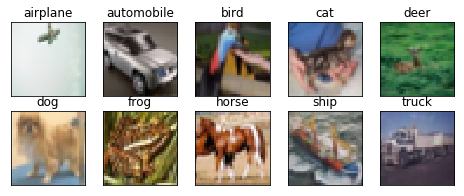

In [11]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::], (1, 2, 0))
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [12]:
train_features.shape, test_labels.shape

((50000, 3, 32, 32), (10000, 1))

### From the train and test dataset, extract the class birds. We will focus on this class, which has 6000 members.

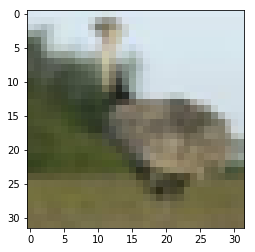

In [13]:
idx = np.where(train_labels[:]==2)[0]
features_idx = train_features[idx,::]
img_num = np.random.randint(features_idx.shape[0])
im = np.transpose(features_idx[img_num,::], (1, 2, 0))
ax.set_title(class_names[i])
plt.imshow(im)
plt.show()

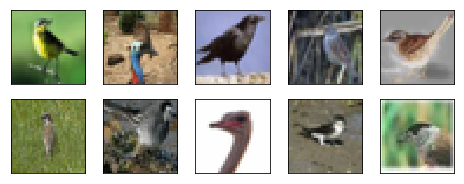

In [14]:
fig = plt.figure(figsize=(8,3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==2)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::], (1, 2, 0))
    plt.imshow(im)
plt.show()

In [78]:
X=np.vstack((train_features,test_features))
y=np.vstack((train_labels,test_labels))

### Those 6000 images have 6000*32* 32 pixels. Choose at least 10% of the pixels randomly. It is strongly recommended that you choose a large number or all of the pixels. You will have between P = 614400 and P = 6144000 pixels. Each pixel is an RGB vector with three elements.

In [79]:
X.shape, y.shape

((60000, 3, 32, 32), (60000, 1))

In [80]:
idx=np.where(train_labels[:]==2)[0]
idx1=np.where(test_labels[:]==2)[0]

In [73]:
tx1=train_features[idx]
tx_labels=train_labels[idx]

In [74]:
tx2=test_features[idx1]
tx2_labels=test_labels[idx1]

In [75]:
x=np.vstack((tx1,tx2))
y=np.vstack((tx_labels,tx2_labels))

In [76]:
x.shape, y.shape

((6000, 3, 32, 32), (6000, 1))

In [84]:
new_x = []
for i in range(len(x)):
    new_x.append(x[i].transpose(1,2,0))

In [87]:
X=np.reshape(new_x, (6144000,3))

In [89]:
X.shape

(6144000, 3)

### Run k-means clustering on the P vectors using k = 4. The centers of the clusters will be your main colors. Convert the colored images to k-color images by converting each pixel's value to the closest main color in terms of Euclidean distance

In [90]:
from sklearn.cluster import KMeans

In [91]:
kmeans=KMeans(n_clusters=4)
kmeans=kmeans.fit(X)

In [92]:
kmeans.cluster_centers_

array([[108.3574251 , 108.03712019,  82.24223723],
       [155.91435803, 155.19052647, 135.03402301],
       [ 48.57450012,  49.55963658,  38.22389511],
       [206.35794932, 211.61247778, 211.24687912]])

In [93]:
X1=X

In [94]:
X1.shape

(6144000, 3)

In [95]:
y=[]

for i in range(len(X1)):
    k=kmeans.labels_[i]
    if k==0:
        y.append([1,0,0,0])
    if k==1:
        y.append([0,1,0,0])
    if k==2:
        y.append([0,0,1,0])
    if k==3:
        y.append([0,0,0,1])


In [96]:
np.shape(y)

(6144000, 4)

In [97]:
y=np.reshape(y,(6000,32,32,4))

### Use any tool (e.g., openCV or scikit-learn) to obtain grayscale 32*32*1 images from the original 32*32*3 images. The grayscale images are inputs of your network.

In [98]:
from skimage.color import rgb2grey

In [99]:
x=[]
X1=np.reshape(X1,(6000,32,32,3))
for i in range(len(X1)):
    x.append(rgb2grey(X1[i]).tolist())    

In [100]:
x=np.reshape(x,(6000,32,32,1))

In [101]:
x.shape

(6000, 32, 32, 1)

In [102]:
c.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=10)

### Running it for 20 epochs

In [116]:
op=c.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,verbose=2)

Train on 5400 samples, validate on 600 samples
Epoch 1/20
 - 64s - loss: 1.5645 - acc: 0.4862 - val_loss: 1.3996 - val_acc: 0.5095
Epoch 2/20
 - 65s - loss: 1.3291 - acc: 0.5097 - val_loss: 1.2275 - val_acc: 0.5144
Epoch 3/20
 - 66s - loss: 0.9144 - acc: 0.6916 - val_loss: 0.7993 - val_acc: 0.7271
Epoch 4/20
 - 68s - loss: 0.7293 - acc: 0.7339 - val_loss: 0.6791 - val_acc: 0.7381
Epoch 5/20
 - 69s - loss: 0.6418 - acc: 0.7395 - val_loss: 0.6049 - val_acc: 0.7417
Epoch 6/20
 - 69s - loss: 0.5743 - acc: 0.7751 - val_loss: 0.5728 - val_acc: 0.8271
Epoch 7/20
 - 69s - loss: 0.5218 - acc: 0.8564 - val_loss: 0.5015 - val_acc: 0.8523
Epoch 8/20
 - 69s - loss: 0.4853 - acc: 0.8569 - val_loss: 0.4817 - val_acc: 0.8383
Epoch 9/20
 - 73s - loss: 0.4517 - acc: 0.8627 - val_loss: 0.4344 - val_acc: 0.8702
Epoch 10/20
 - 71s - loss: 0.4348 - acc: 0.8590 - val_loss: 0.4277 - val_acc: 0.8675
Epoch 11/20
 - 70s - loss: 0.4160 - acc: 0.8616 - val_loss: 0.3940 - val_acc: 0.8705
Epoch 12/20
 - 70s - loss: 

In [117]:
pred=c.predict(X_test).reshape(614400,4)
result=[]
for i in range(len(pred)):
    result.append([int(val) for val in kmeans.cluster_centers_[np.argmax(pred[i])]])
result=np.reshape(result,(600,32,32,3))

### Comparing the original and artificially coloured versions
### Below are the predicted images

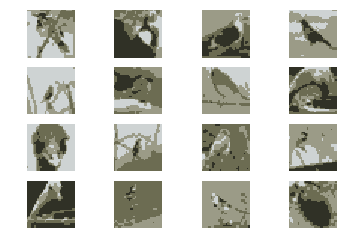

In [126]:
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = result[i]
    axis.imshow(arr)
    plt.axis('off')
plt.show()

In [121]:
y_test_reshaped=y_test.reshape(614400,4)
color = []
for i in range(len(y_test_reshaped)):
    color.append([int(val) for val in kmeans.cluster_centers_[np.argmax(y_test_reshaped[i])]])
color=np.reshape(color,(600,32,32,3))

### Below are the original images

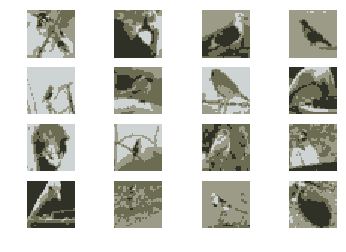

In [127]:
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = color[i]
    axis.imshow(arr)
    plt.axis('off')
plt.show()

### Plot training,(validation), and test errors in each epoch. 

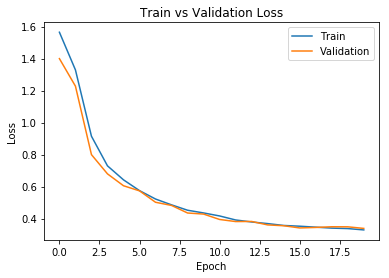

In [120]:
plt.plot(op.history['loss'])
plt.plot(op.history['val_loss'])
plt.title('Train vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

The above table shows the loss, validation loss, accuracy and validation accuracy for training the model for 20 epochs. The graph shows the train and validation error for each epoch.